# Final Assignment 

Below is an example of a code cell. 
Put your cursor into the cell and press Shift+Enter to execute it and select the next one, or click !here goes the icon of the corresponding button in the gutter! button.
To debug a cell, press Alt+Shift+Enter, or click !here goes the icon of the corresponding button in the gutter! button.

Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.

To learn more about Jupyter Notebooks in PyCharm, see [help](https://www.jetbrains.com/help/pycharm/jupyter-notebook-support.html).
For an overview of PyCharm, go to Help -> Learn IDE features or refer to [our documentation](https://www.jetbrains.com/help/pycharm/getting-started.html).

In [175]:
## import necessary library 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.model_selection import train_test_split


In [176]:
laptop_data = pd.read_csv("C:\\Users\\61450\\Downloads\\Laptop_price.csv")

In [177]:
laptop_data.head() ## Print out the first five observations

,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
0,Asus,3.830296,16,512,11.185147,2.641094,17395.093065
1,Acer,2.912833,4,1000,11.311372,3.260012,31607.605919
2,Lenovo,3.241627,4,256,11.853023,2.029061,9291.023542
3,Acer,3.806248,16,512,12.280360,4.573865,17436.728334
4,Acer,3.268097,32,1000,14.990877,4.193472,32917.990718


# 1. Data Pre-Processing

In this step, we are trying to clean up the raw data:

In [178]:
## Delete duplicate data
laptop_data = laptop_data.drop_duplicates()
laptop_data.head(10)

,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
0,Asus,3.830296,16,512,11.185147,2.641094,17395.093065
1,Acer,2.912833,4,1000,11.311372,3.260012,31607.605919
2,Lenovo,3.241627,4,256,11.853023,2.029061,9291.023542
3,Acer,3.806248,16,512,12.280360,4.573865,17436.728334
4,Acer,3.268097,32,1000,14.990877,4.193472,32917.990718
5,HP,1.881348,16,256,11.943958,4.840268,9543.719980
6,Lenovo,2.940721,32,256,11.713246,4.344846,10390.137319
7,Lenovo,3.016788,4,256,15.588315,2.941120,9214.484506
8,Lenovo,2.560327,4,512,15.026332,2.743620,16372.175284
9,Acer,3.341111,32,512,13.611945,4.093149,18501.832733


In [179]:
## Delete Missing Value
laptop_data.isnull().sum()
## There is no missing value so we do not need to do anything

Brand               0
Processor_Speed     0
RAM_Size            0
Storage_Capacity    0
Screen_Size         0
Weight              0
Price               0
dtype: int64

In [180]:
## This is the final data set after pre-processing modification 
laptop_data.head()


,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
0,Asus,3.830296,16,512,11.185147,2.641094,17395.093065
1,Acer,2.912833,4,1000,11.311372,3.260012,31607.605919
2,Lenovo,3.241627,4,256,11.853023,2.029061,9291.023542
3,Acer,3.806248,16,512,12.280360,4.573865,17436.728334
4,Acer,3.268097,32,1000,14.990877,4.193472,32917.990718


# 2. Defining the Problem Statement

In here, we are trying to find each laptop brand prices, and also their processor speed, RAM, ROM and weights

In [181]:
## Showing the laptop price collums
laptop_data.shape
## In here, we have 1000 rows and 7 collums

(1000, 7)

In [182]:
## Min max
laptop_data.describe()

,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.750611,15.500000,584.576000,14.056790,3.466919,19604.187963
std,0.731796,10.988665,313.438517,1.705882,0.866541,9406.064880
min,1.511580,4.000000,256.000000,11.012111,2.000560,8570.012950
25%,2.089246,8.000000,256.000000,12.635523,2.717211,10114.012948
50%,2.760885,16.000000,512.000000,14.099643,3.464630,17287.241878
75%,3.362610,32.000000,1000.000000,15.528590,4.212583,31566.214754
max,3.998534,32.000000,1000.000000,16.985737,4.990728,33503.935037


In [183]:
## The info() method in Pandas provides a concise summary of a DataFrame. It shows:

# The number of rows and columns.
# Column names and their data types.
# The number of non-null (non-missing) values in each column.
# The memory usage of the DataFrame.

laptop_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             1000 non-null   object 
 1   Processor_Speed   1000 non-null   float64
 2   RAM_Size          1000 non-null   int64  
 3   Storage_Capacity  1000 non-null   int64  
 4   Screen_Size       1000 non-null   float64
 5   Weight            1000 non-null   float64
 6   Price             1000 non-null   float64
dtypes: float64(4), int64(2), object(1)
memory usage: 54.8+ KB


# 3. Visualising the distribution of Target variable
Identify the dependent/target variable, or the prediction variable and look at the distribution to assess the class imbalance in data (whether the data is balanced or skewed).

array([[<Axes: title={'center': 'Processor_Speed'}>,
        <Axes: title={'center': 'RAM_Size'}>],
       [<Axes: title={'center': 'Storage_Capacity'}>,
        <Axes: title={'center': 'Screen_Size'}>],
       [<Axes: title={'center': 'Weight'}>,
        <Axes: title={'center': 'Price'}>]], dtype=object)

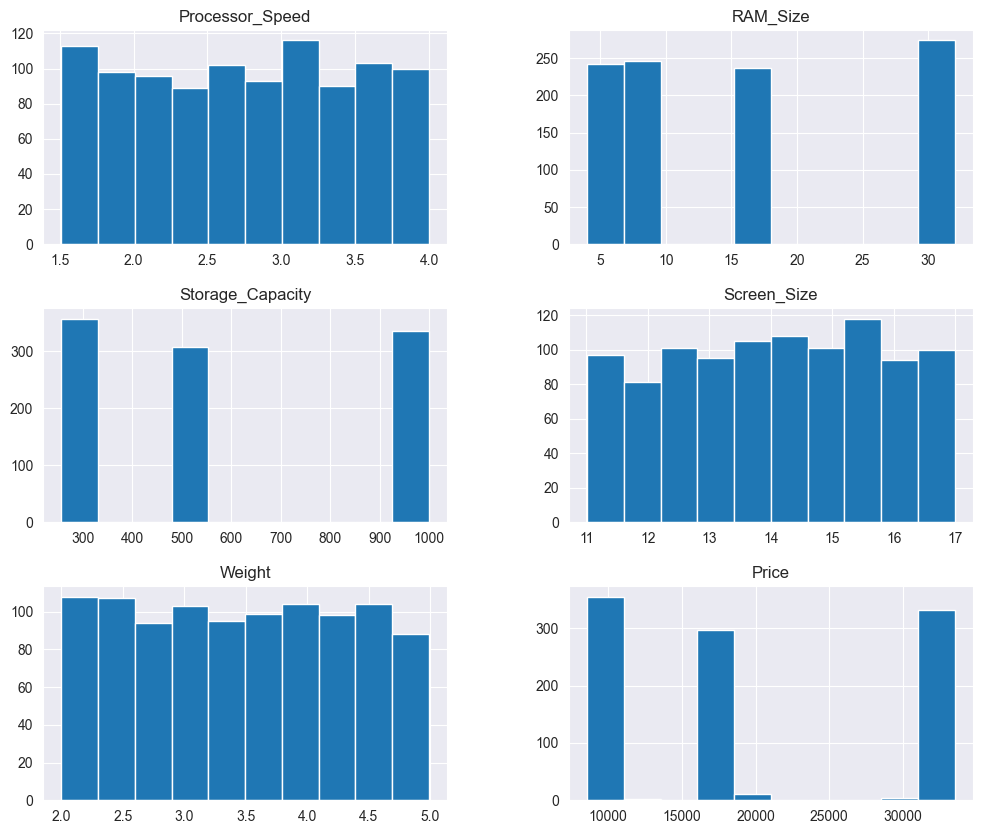

In [184]:
laptop_data.hist(figsize=(12,10))

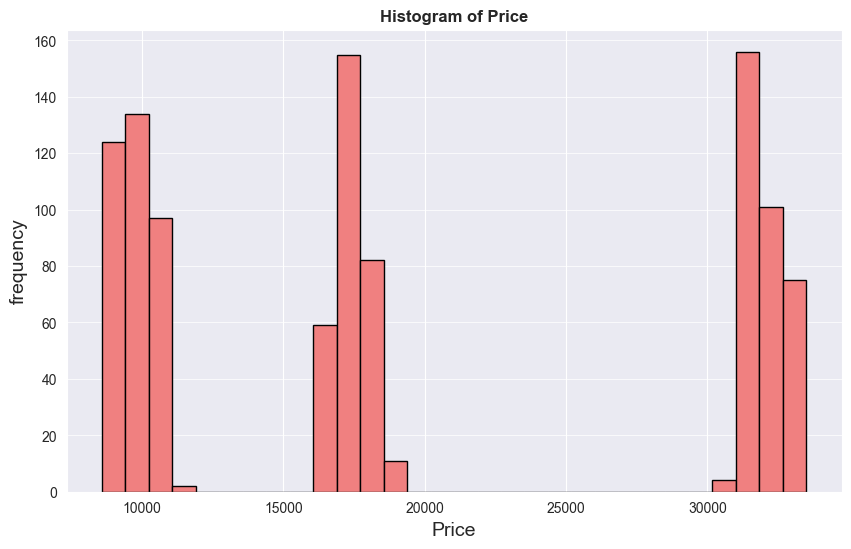

In [185]:
plt.figure(figsize=(10, 6))
plt.hist(laptop_data['Price'], bins=30, color='lightcoral', edgecolor='black')
plt.title('Histogram of Price', fontweight='bold')
plt.xlabel('Price',fontsize=14)
plt.ylabel('frequency',fontsize=14)
plt.grid(axis='y', alpha=0.75)
plt.show()

# 4. Data exploration at basic level 

This step is needed to gauge the overall data, the volume of data, the types of columns present in the data. This initial assessment of the data is needed to identify which columns are Quantitative, Categorical or Qualitative, and identify and remove unwanted columns.

In here, we can see that all data are numeric, so I will keep all of them to do further analysis 

# 5. Visual Exploratory Data Analysis (EDA) of data (with histogram and barcharts)

This requires visualising distribution of all the categorical predictor variables in the data using bar plots, and continuous predictor variables using histograms.

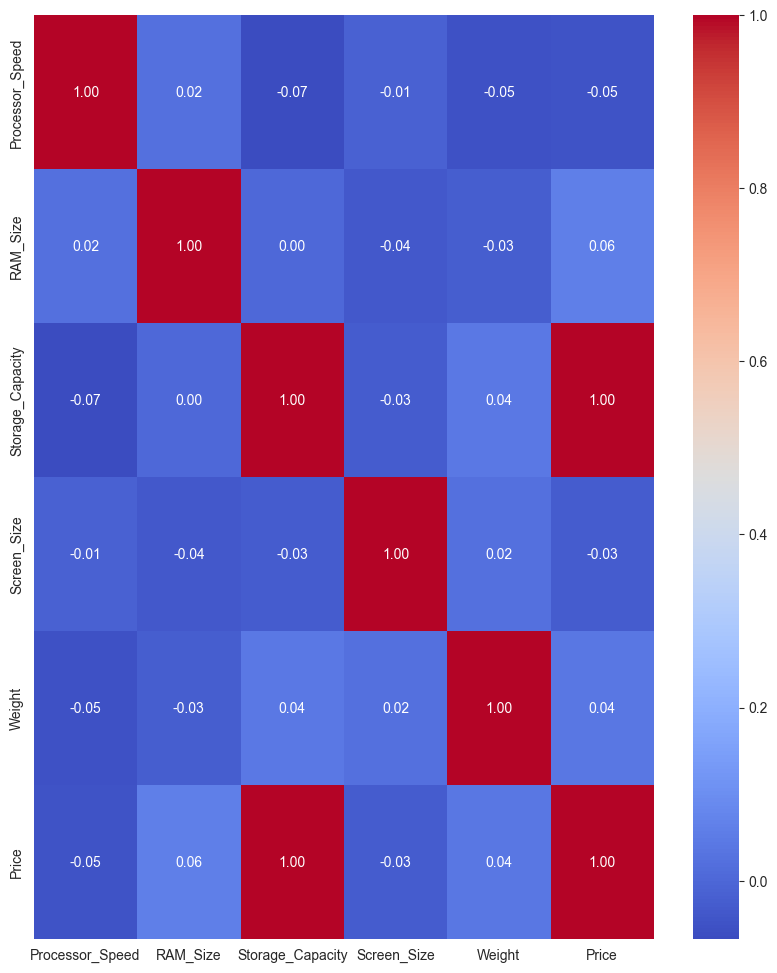

In [186]:
# ## create a temporary variable to store laptop_price_df without string value in brand name collums, because heatmap will not be able to draw with string value 


laptop_temporary = laptop_data.drop(columns=['Brand'])

# Plot the heatmap for the correlation of numeric columns
plt.figure(figsize=(10, 12))
sns.heatmap(laptop_temporary.corr(), annot=True,  cmap='coolwarm',fmt='.2f')

# Show the heatmap
plt.show()

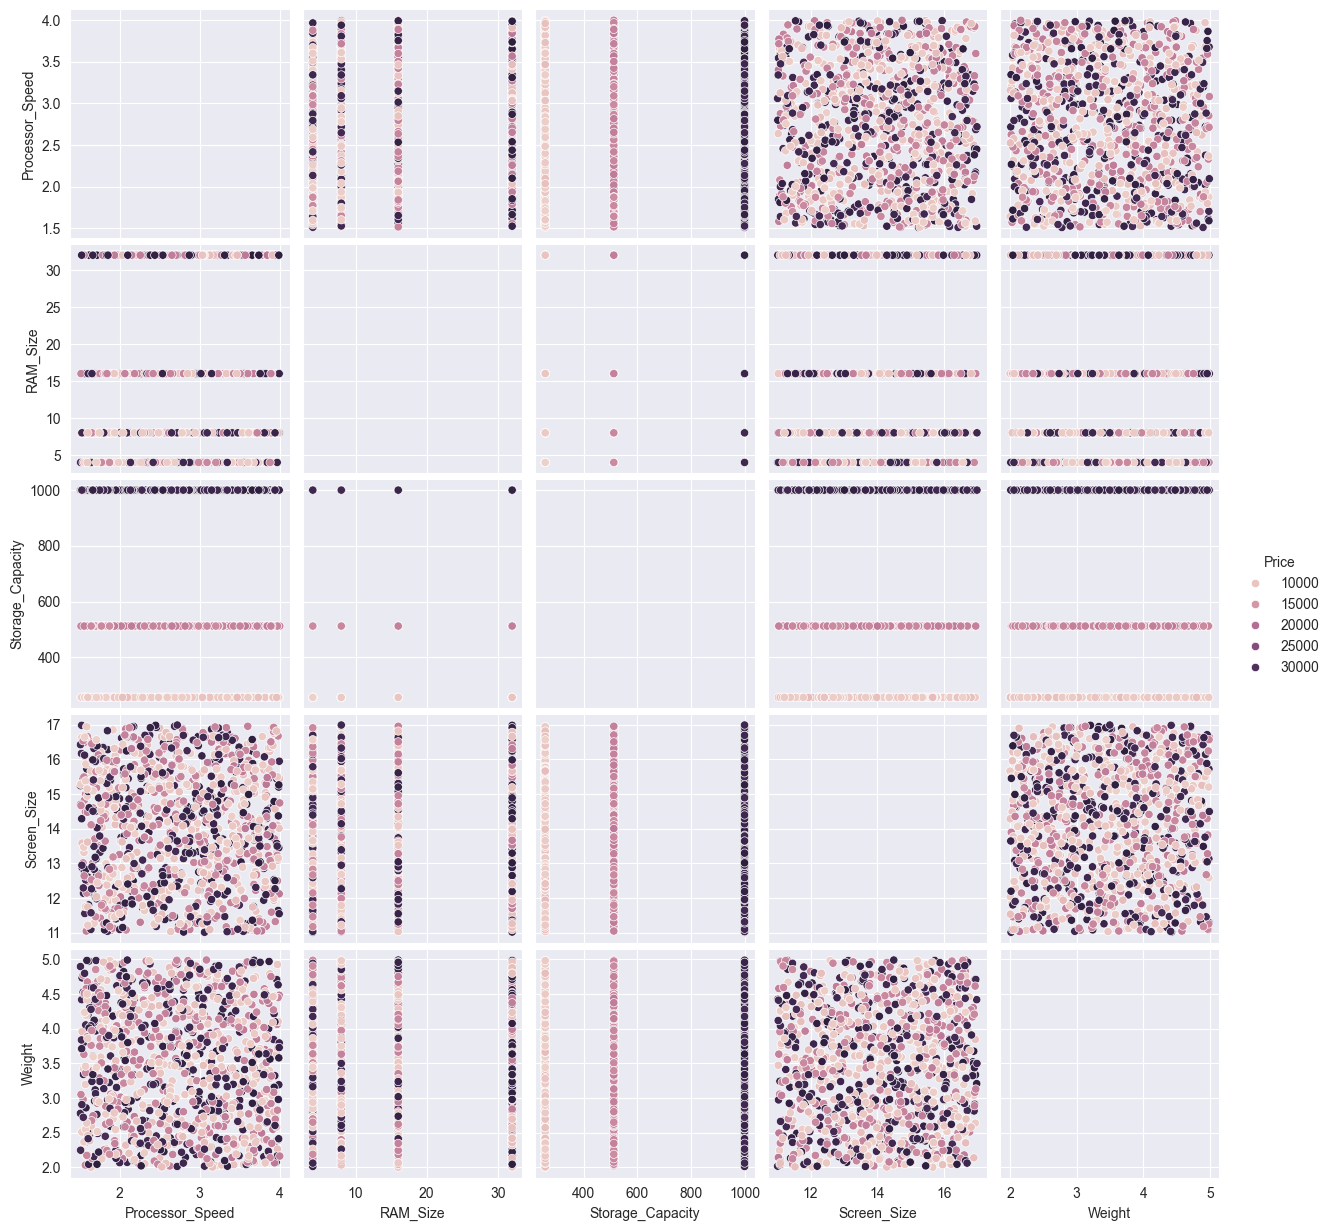

In [187]:
# Adjusting the code for the variables from your dataset
sns.pairplot(laptop_data, hue='Price', vars=['Processor_Speed', 'RAM_Size', 'Storage_Capacity', 'Screen_Size', 'Weight'])

# Show the plots
plt.show()

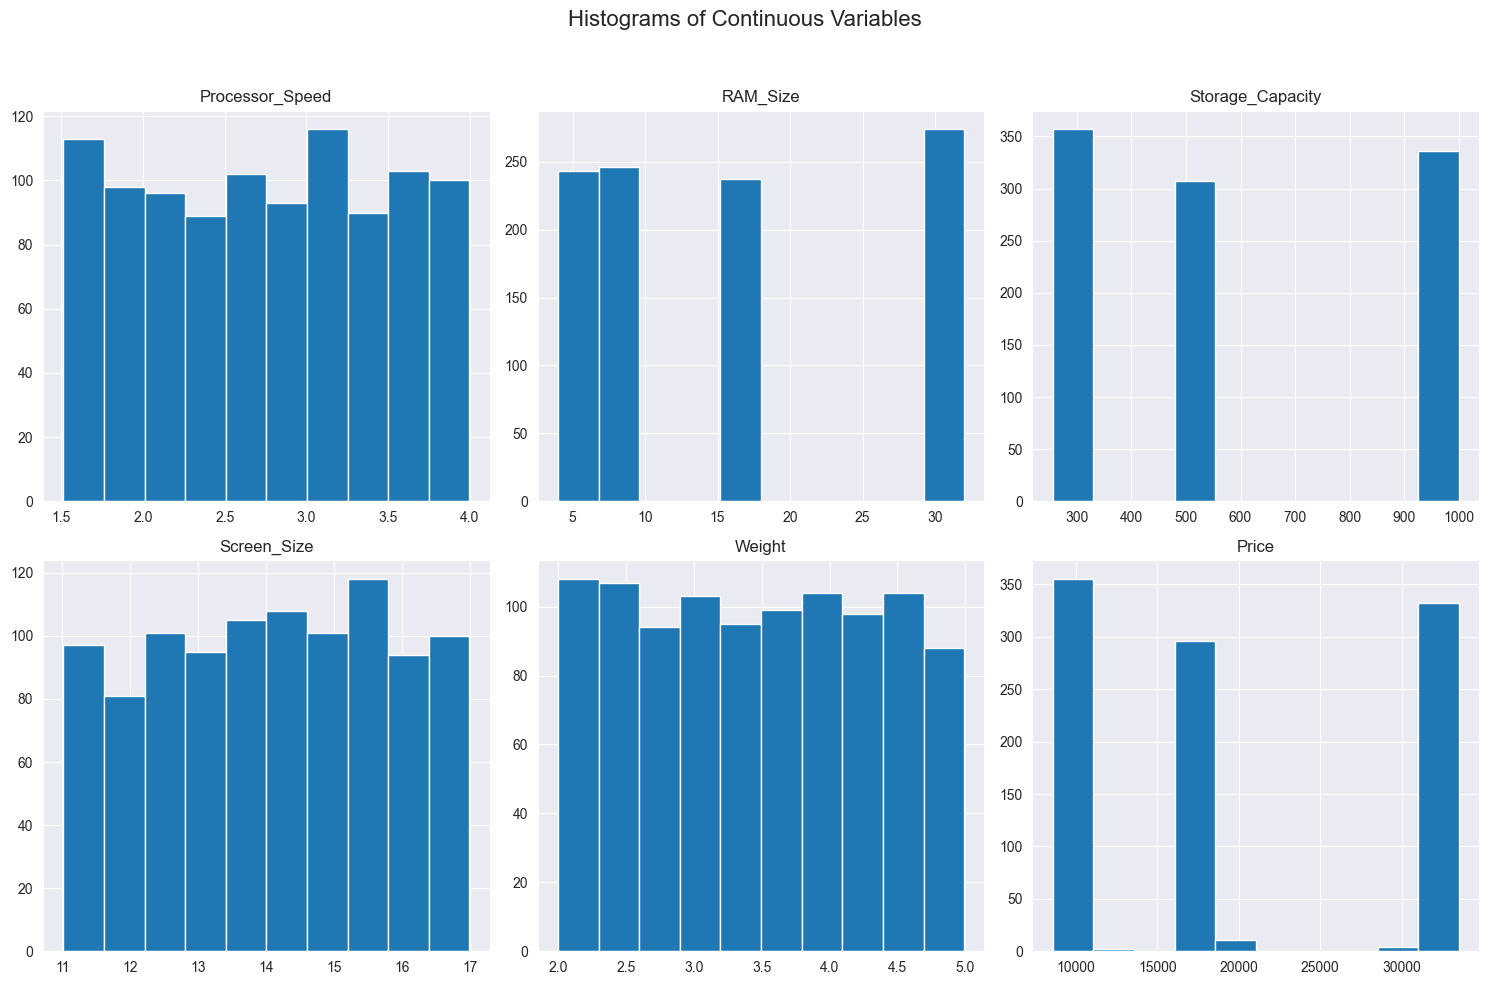

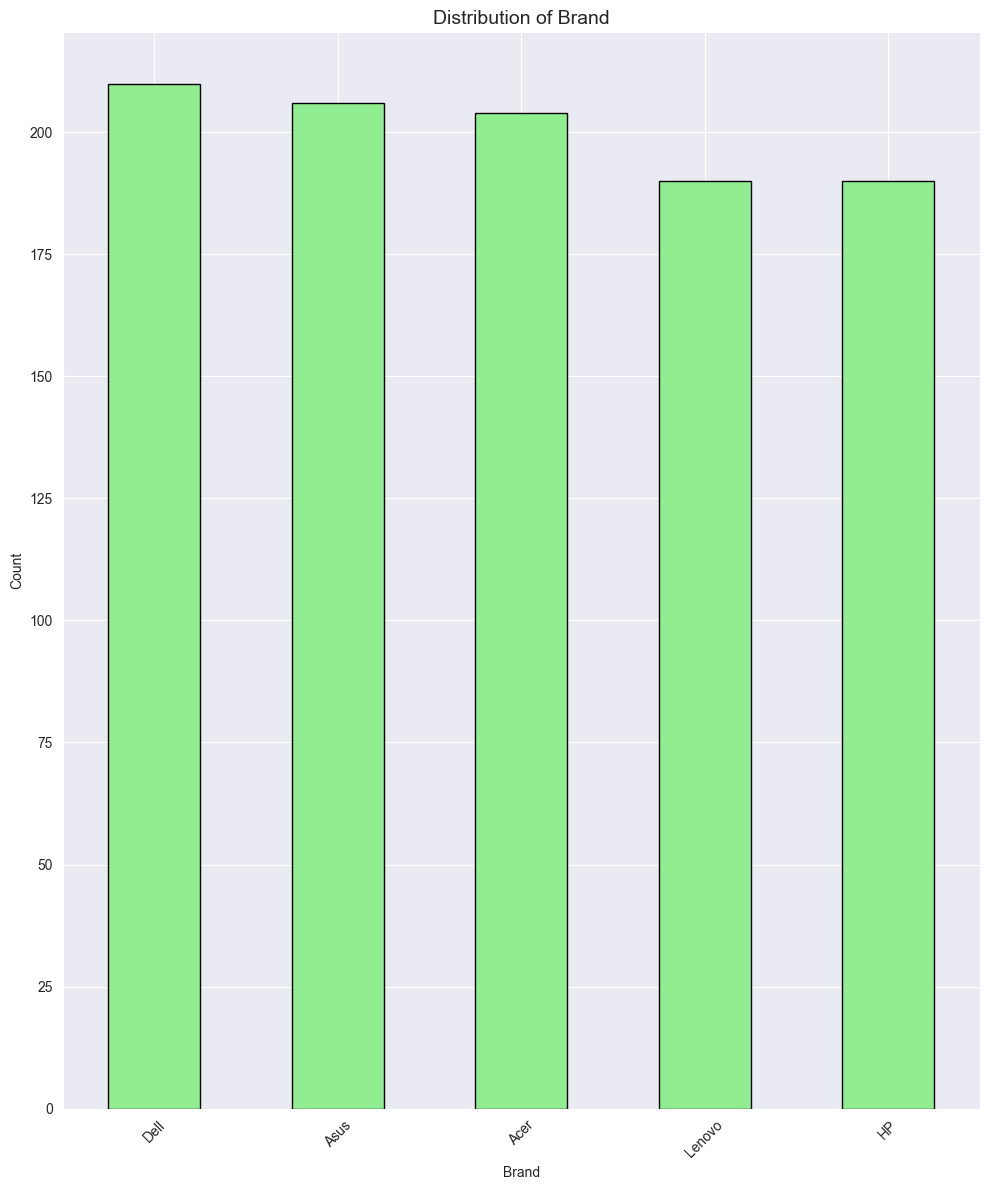

In [188]:
categorical_columns = ['Brand']
continuous_columns = ['Processor_Speed', 'RAM_Size', 'Storage_Capacity', 'Screen_Size', 'Weight', 'Price']

# Create subplots for continuous variables (histograms)
laptop_data[continuous_columns].hist(figsize=(15, 10), layout=(2, 3))

# Display the histograms
plt.suptitle('Histograms of Continuous Variables', fontsize=16)
plt.tight_layout(rect=[0,0,1,0.95])
plt.show()

# Create bar plots for categorical variables
for col in categorical_columns:
    plt.figure(figsize=(10, 12))
    laptop_data[col].value_counts().plot(kind='bar',color='lightgreen',edgecolor='black')
    plt.title(f'Distribution of {col}',fontsize=14)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

<Axes: xlabel='Brand', ylabel='Price'>

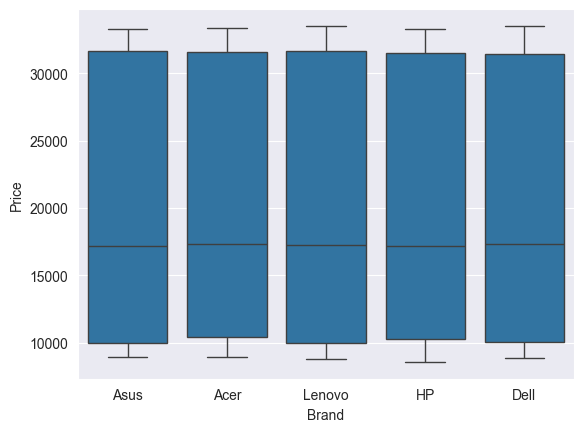

In [189]:
sns.boxplot(data=laptop_data, x='Brand', y='Price')
## Boxplot 

<Axes: xlabel='Brand', ylabel='Price'>

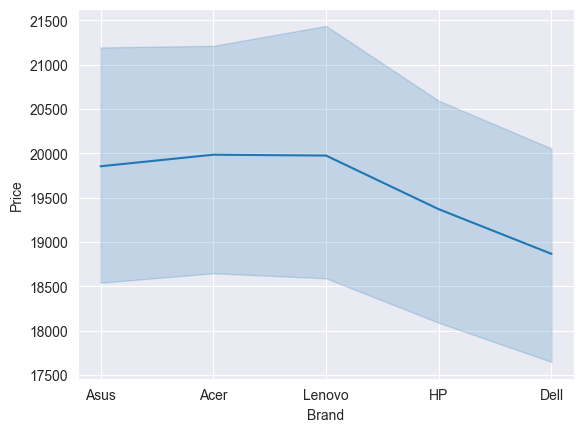

In [190]:
sns.lineplot(data=laptop_data, x='Brand', y='Price')


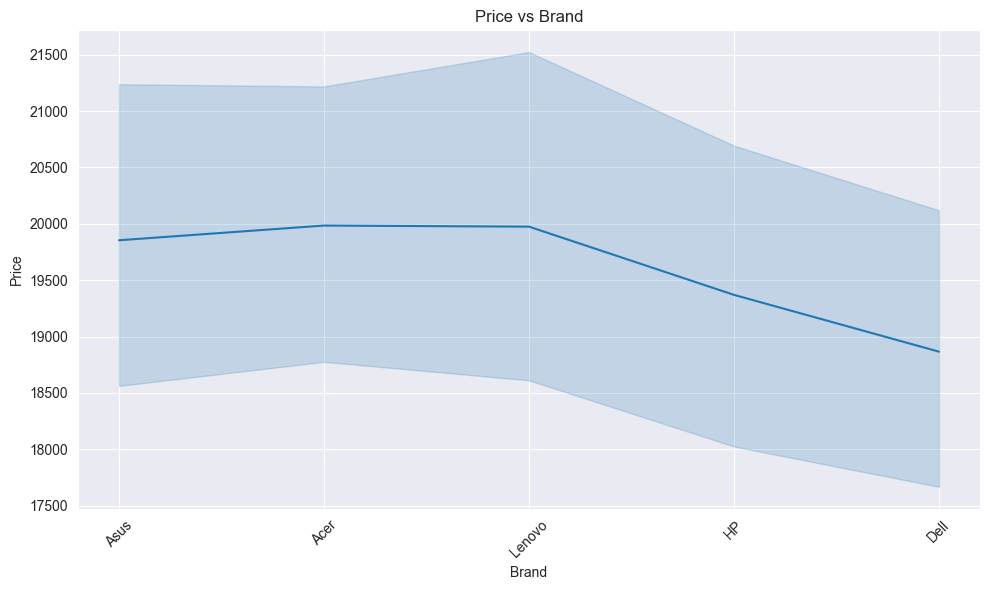

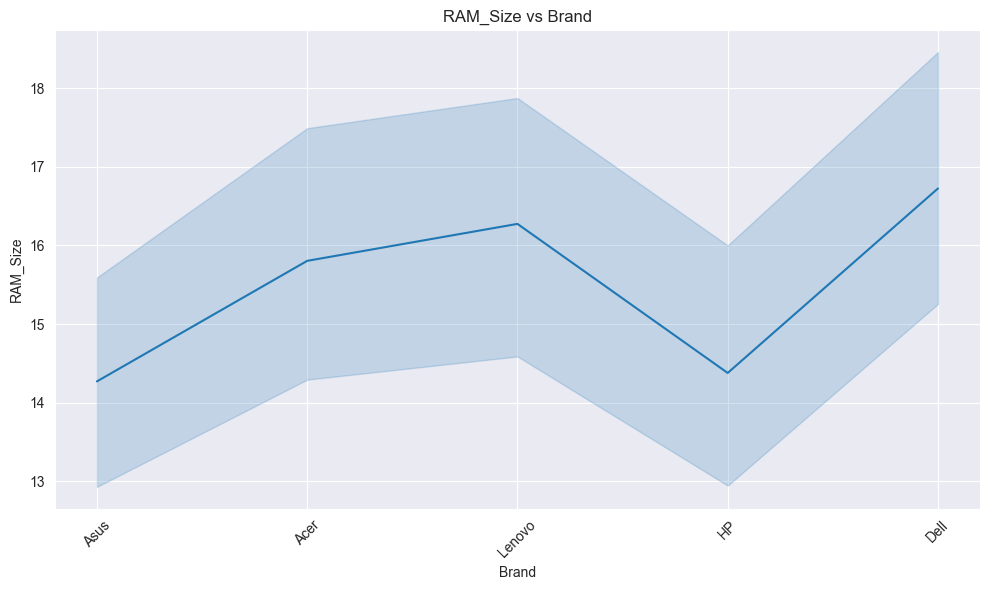

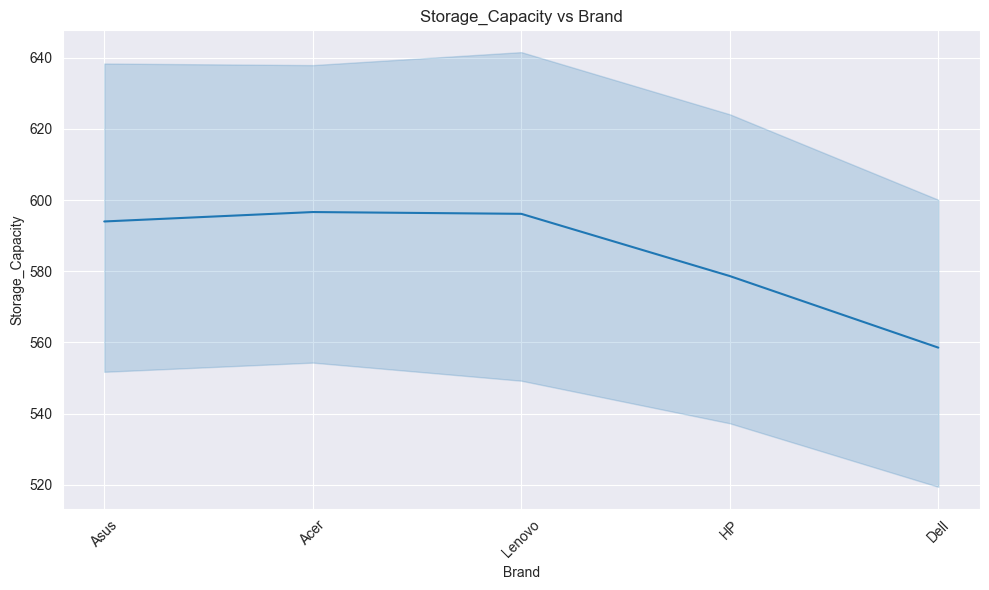

In [191]:
# Identify categorical and numeric columns
categorical_columns = ['Brand']  # Modify this to include all your categorical columns
numeric_columns = ['Price', 'RAM_Size', 'Storage_Capacity']  # Modify this to include all your numeric columns

# Loop through each categorical column and each numeric column to create line plots
for cat_col in categorical_columns:
    for num_col in numeric_columns:
        plt.figure(figsize=(10, 6))
        sns.lineplot(data=laptop_data, x=cat_col, y=num_col)
        plt.title(f'{num_col} vs {cat_col}')
        plt.xticks(rotation=45)  # Rotate x labels for better readability
        plt.tight_layout()
        plt.show()

# part 6 outlier analysis 

In [192]:
laptop_temporary_2= laptop_data.drop(columns=['Brand'])
def find_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers

find_outliers_IQR(laptop_temporary)

laptop_temporary_2.isnull().sum()

##There is no outlier 

Processor_Speed     0
RAM_Size            0
Storage_Capacity    0
Screen_Size         0
Weight              0
Price               0
dtype: int64

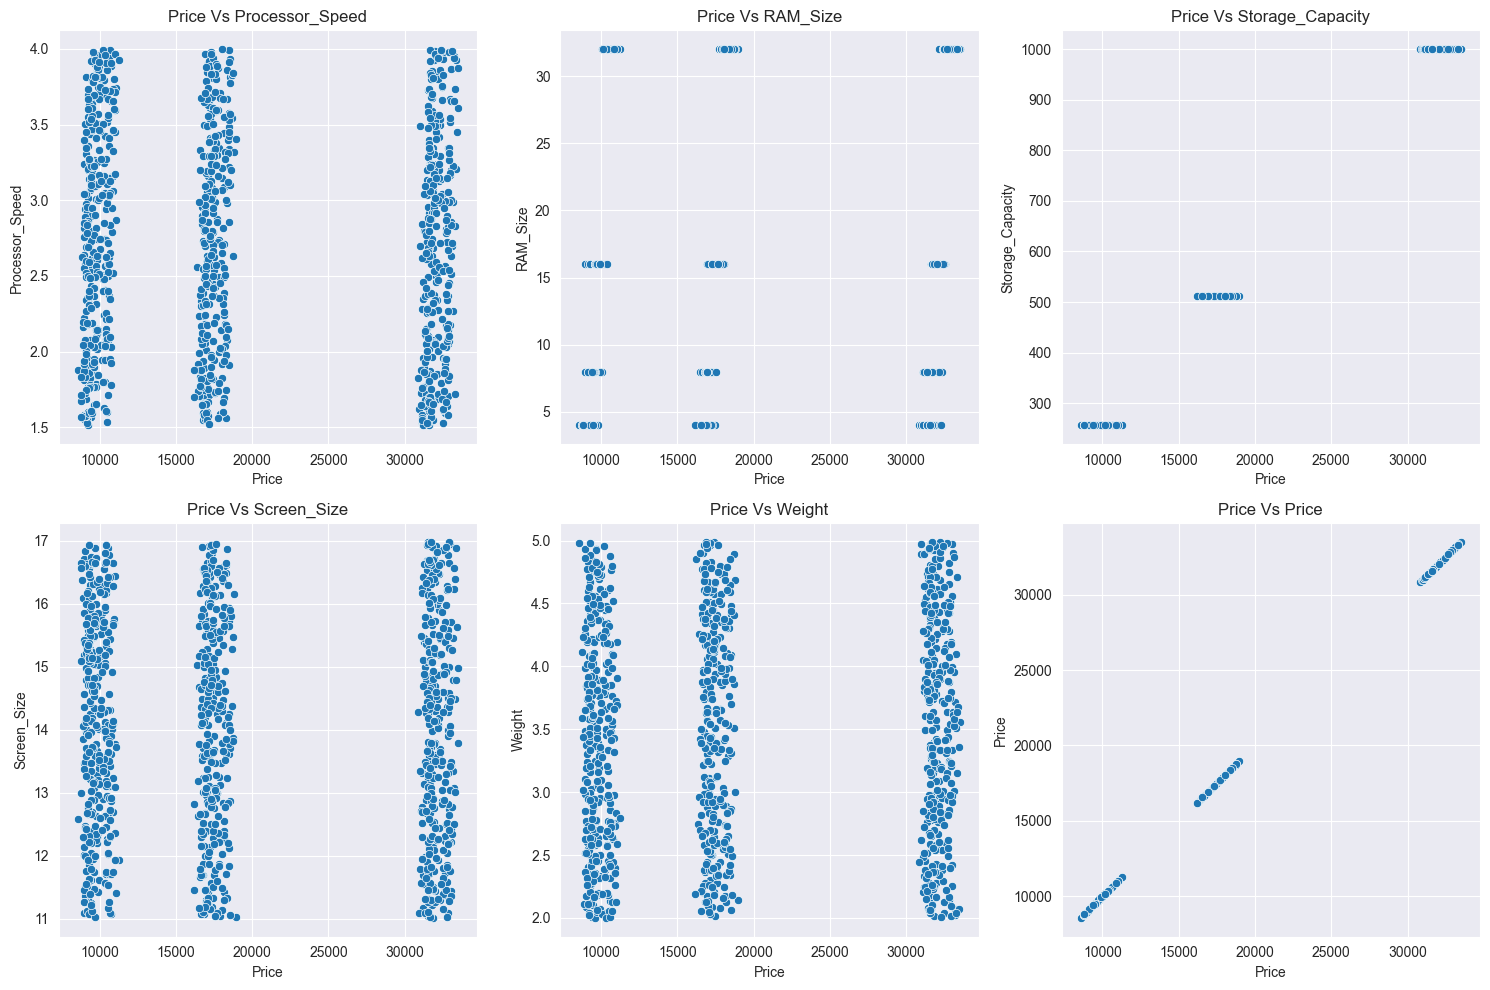

In [193]:
num_cols = len(laptop_temporary_2.columns)

# Calculate the number of rows needed
num_rows = (num_cols // 3) + (num_cols % 3 > 0)

# Create a figure and an array of subplots
fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5*num_rows))

# Loop through each column in the DataFrame and create scatter plots
for i, x in enumerate(laptop_temporary_2.columns):
    row = i // 3
    col = i % 3
    ax = axes[row, col] if num_rows > 1 else axes[col]
    
    sns.scatterplot(data=laptop_temporary_2, x='Price', y=x, ax=ax)
    ax.set_title(f'Price Vs {x}')

# Remove any unused subplots
for i in range(num_cols, num_rows*3):
    row = i // 3
    col = i % 3
    fig.delaxes(axes[row, col] if num_rows > 1 else axes[col])

plt.tight_layout()
plt.show()

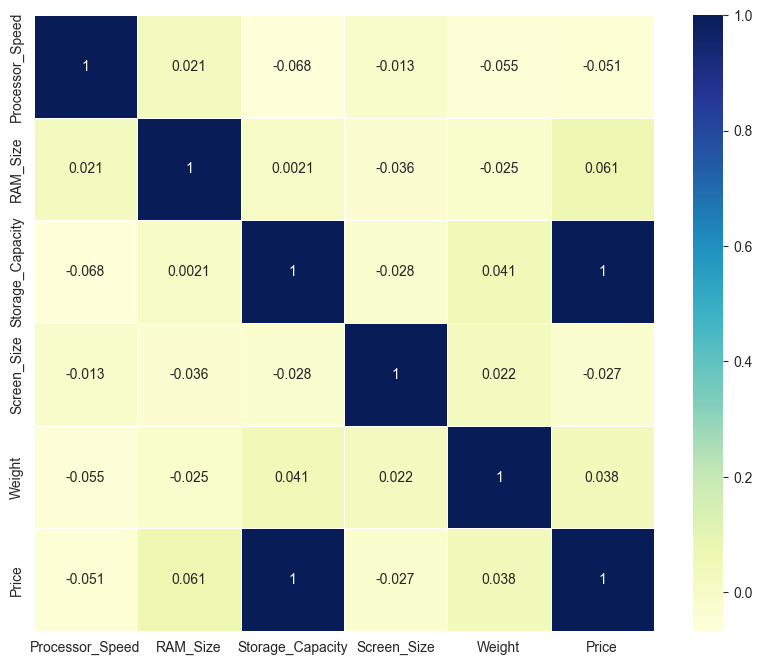

In [194]:
# Calculate the correlation matrix
correlation_matrix = laptop_temporary_2.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu", linewidths=.5)

# Show the plot
plt.show()

In [195]:
# Extracting the correlation values for Price with the other features
price_correlation = correlation_matrix['Price'].sort_values(ascending=False)

# Display the correlation values
price_correlation

## Storage_capacity is the strongest corelation

# There is no corelation: 
# RAM_Size            0.061237
# Weight              0.038417
# Screen_Size        -0.026740
# Processor_Speed    -0.050737






Price               1.000000
Storage_Capacity    0.997908
RAM_Size            0.061237
Weight              0.038417
Screen_Size        -0.026740
Processor_Speed    -0.050737
Name: Price, dtype: float64

In [196]:
price_corr = dict(laptop_temporary_2.corr()['Price'])
strong_corr_attrs = dict(filter(lambda x: x[1] >= 0.7 and x[0] != 'Price', price_corr.items()))
strong_corr_attrs.keys()

dict_keys(['Storage_Capacity'])

In [197]:
price_corr = dict(laptop_temporary_2.corr()['Price'])
weak_corr_attrs = dict(filter(lambda x: x[1] < 0.3 and x[0] != 'Price', price_corr.items()))
weak_corr_attrs.keys()

dict_keys(['Processor_Speed', 'RAM_Size', 'Screen_Size', 'Weight'])

In [198]:
price_corr = dict(laptop_temporary_2.corr()['Price'])
moderate_corr_attrs = dict(filter(lambda x: x[1] >= 0.7 and x[1] < 0.3 and x[0] != 'Price', price_corr.items()))
moderate_corr_attrs.keys()

dict_keys([])

In [199]:
# Perform ANOVA to check if there's a significant difference in Price between different Brands
anova_result = stats.f_oneway(
    *[laptop_data[laptop_data['RAM_Size'] == brand]['Price'] for brand in laptop_data['RAM_Size'].unique()]
)

# Display the result
print("F-statistic:", anova_result.statistic)
print("p-value:", anova_result.pvalue)

# Check if p-value is significant
if anova_result.pvalue < 0.05:
    print("Reject H0: There is a significant difference in Price between different Brands.")
else:
    print("Fail to reject H0: No significant difference in Price between different Brands.")

F-statistic: 2.1261838981544265
p-value: 0.09529165426315755
Fail to reject H0: No significant difference in Price between different Brands.


In [200]:
# Load the dataset (assuming it's already loaded into laptop_price_df)

# Convert the 'Brand' column (nominal) to numeric using get_dummies()
laptop_temporary_3 = pd.get_dummies(laptop_data, columns=['Brand'], drop_first=True)

# Display the first few rows of the converted dataset
print(laptop_temporary_3.head())

   Processor_Speed  RAM_Size  Storage_Capacity  Screen_Size    Weight  \
0         3.830296        16               512    11.185147  2.641094   
1         2.912833         4              1000    11.311372  3.260012   
2         3.241627         4               256    11.853023  2.029061   
3         3.806248        16               512    12.280360  4.573865   
4         3.268097        32              1000    14.990877  4.193472   

          Price  Brand_Asus  Brand_Dell  Brand_HP  Brand_Lenovo  
0  17395.093065        True       False     False         False  
1  31607.605919       False       False     False         False  
2   9291.023542       False       False     False          True  
3  17436.728334       False       False     False         False  
4  32917.990718       False       False     False         False  


In [201]:

# Assuming you have already converted nominal variables and loaded the dataset
# We will use 'Price' as the target variable (y) and the rest as features (X)
X = laptop_temporary_3.drop(columns=['Price'])  # Features (excluding the target)
y = laptop_temporary_3['Price']  # Target variable

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

# Display the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (800, 9)
X_test shape: (200, 9)
y_train shape: (800,)
y_test shape: (200,)
